<a href="https://colab.research.google.com/github/Emily-KD/DS200/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade datascience

     |████████████████████████████████| 721 kB 4.1 MB/s 
     |████████████████████████████████| 95 kB 2.6 MB/s 
  Created wheel for datascience: filename=datascience-0.17.0-py3-none-any.whl size=726848 sha256=e0003c4a5b7141fd779c31dc2dbc40cba06482c3e3968c28a33265f8b9c9abf6
  Stored in directory: /root/.cache/pip/wheels/41/e0/1b/bc890a517ad4212eb7180ccca6497c97d0ca7c28342b236888
Successfully built datascience
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
  Attempting uninstall: datascience
    Found existing installation: datascience 0.10.6
    Uninstalling datascience-0.10.6:
      Successfully uninstalled datascience-0.10.6


In [ ]:
from datascience import *
import matplotlib
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [ ]:
ckd = Table.read_table(path_data + 'ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


In [ ]:
ckd = ckd.select('Class', 'Hemoglobin', 'White Blood Cell Count')
ckd

Class,Hemoglobin,White Blood Cell Count
1,11.2,6700
1,9.5,12100
1,10.8,4500
1,5.6,11000
1,7.7,9200
1,9.8,6900
1,12.5,9600
1,10,18900
1,10.5,7200
1,9.8,14600


In [ ]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)

In [ ]:
ckd.show()

Class,Hemoglobin,White Blood Cell Count,Color
0,15,10400,gold
0,17,9800,gold
0,15.9,9100,gold
0,15.4,6200,gold
0,13,8300,gold
0,13.6,9200,gold
0,14.5,10700,gold
0,14,9100,gold
0,13.9,8400,gold
0,16.1,4300,gold


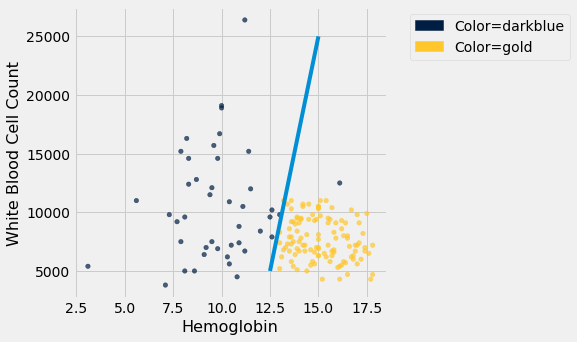

In [ ]:
ckd.scatter('Hemoglobin', 'White Blood Cell Count', group='Color')
plots.plot([12.5, 15], [5000,25000]); # Be sure to substitute actual values for x1 and x2 here

In [ ]:
def ckd_logistic(a, b, c):
  Hem = ckd.column('Hemoglobin')
  WBC = ckd.column('White Blood Cell Count')
  y = ckd.column('Class')
  linear = a*Hem + b*WBC + c
  return np.mean(np.log(1+np.exp(linear)) - y*linear)

##Step. 7

In [ ]:
best = minimize(ckd_logistic)
best

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


array([-2.71079080e+00,  8.36738029e-04,  2.70052496e+01])

In [ ]:
ckd_logistic(best.item(0), best.item(1), best.item(2))

0.0806233955079064

In [ ]:
np.exp(0.0806233955079064) / (1 + np.exp(0.0806233955079064))

0.5201449379961114

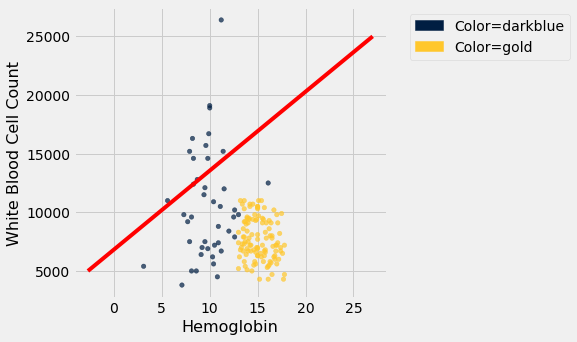

In [ ]:
ckd.scatter('Hemoglobin', 'White Blood Cell Count', group='Color')
plots.plot([best.item(0), best.item(1)], [5000,25000], color='red'); # Be sure to substitute actual values for x1 and x2 here

In [ ]:
ckd_logistic(12, 7500, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


inf